<h1><b>TESTS</b>
</h1>

<b>MSE (Mean Square Error)</b>
<br>
The lower, the better. Indicates the amount of noise contained within a picture.
<br>
<br>
$ MSE = \frac{\sum_{m,n} [I_1(m,n)-I_2(m,n)]^{2}}{M \cdot N} $ 
<br>
<br>
<br>
<b>PSNR (Peak Signal to Noise Ratio)</b>
<br>
The higher, the better. Indicates the maximum amount of noise relative to the picture.
<br>
<br>
$ PSNR = 10\log_{10} \left(\frac{R^2}{MSE}\right) $ 

In [12]:
# MSE
from PIL import Image
import numpy as np
from FFT_stego import convert, stego_path_generator

# cover_img_path = "ImageSources\\jfif\\darth_vader.jfif"
# cover_img_path = "ImageSources\\jfif\\the_rock.jfif"
# cover_img_path = "ImageSources\\jfif\\obi-wan_kenobi.jfif"
# PATH = "ImageSources\\png\\r2d2.png"
# cover_img_path = "ImageSources\\jpg\\iron_patriot.jpg"
cover_img_path = "ImageSources\\tif\\lena_color_256.tif"
# stego_img_path = "ImageSources\\Steganograms\\remerged_sharp.png"
stego_img_path = "ImageSources\\Steganograms\\lena_color_256_steg.png"

# stego_img_path = stego_path_generator(cover_img_path, "png")

image0 = Image.open(cover_img_path)
red0, green0, blue0 = image0.split()
image1 = Image.open(stego_img_path)
red1, green1, blue1 = image1.split()

red0 = np.array(red0)

# takes into account the error that occurs when transforming the channel to the frequency domain
def fft_correction(channel, clip: bool=False):
    fft = np.fft.fft2(channel)
    ifft = np.fft.ifft2(np.abs(fft)*np.exp(1j*np.angle(fft))).real
    if clip:
        converted = np.clip(ifft, 0,255).astype(np.uint8)
    else:
        converted = convert(ifft, 0,255, np.uint8)
    return converted

# red0 = fft_correction(red0)

red1 = np.array(red1)

cols, rows = red0.shape


mse = np.divide(np.sum(np.square(np.subtract(red0, red1))), np.multiply(*(red0.shape)))
print("MSE = ", mse)

psnr = 20*np.log10(255) - 10*np.log10(mse)
print("PSNR =", psnr, "db")

MSE =  21.806304931640625
PSNR = 34.74498280055507 db


<h2>CROP</h2>

(256, 256)


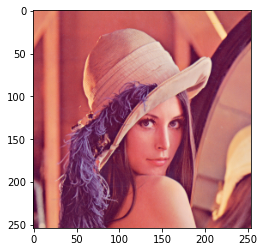

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
from FFT_stego import crop_path_generator, stego_path_generator

# cover_img_path = "ImageSources\\jpg\\lena_color_256.tif"
# stego_img_path = stego_path_generator(cover_img_path, "png")
stego_img_path = "ImageSources\\Steganograms\\lena_color_256_steg.png"

image = Image.open(stego_img_path)
size = image.size
print(size)

crop = 0.01  # crop 50%
crop /= 2

# left, up , right, bottom
# crop the image
cropped = image.crop((round(size[0]*crop),round(size[1]*crop), round(size[0]*(1-crop)),round(size[1]*(1-crop))))

# generates the path for the stego image from the name of the cover image and the path the current python file resides on

crop_img_path = crop_path_generator(stego_img_path, "png")
plt.figure()
plt.imshow(cropped)


cropped.save(crop_img_path)

<h2>Resize</h2>

In [14]:
from PIL import Image
from FFT_stego import resize_path_generator

stego_img_path = "ImageSources\\Steganograms\\lena_color_256_steg.png"

steg = Image.open(stego_img_path)
cols, rows = steg.size

grow_factor = 1.005
steg_resize = steg.resize((round(rows/grow_factor), round(cols/grow_factor)))

resize_img_path = resize_path_generator(stego_img_path, "png")
steg_resize.save(resize_img_path)

<h2>Rotate</h2>

In [23]:
from PIL import Image
from FFT_stego import rotate_path_generator

stego_img_path = "ImageSources\\Steganograms\\lena_color_256_steg.png"
#read the image
im = Image.open(stego_img_path)

#rotate image
angle = 45
out = im.rotate(angle)
# out = im.rotate(angle, expand=True)

stego_img_path = rotate_path_generator(stego_img_path, "png")
out.save(stego_img_path)

<h2>Decoder</h2>

In [35]:
from FFT_stego import steg_decode_simple

stego_img_path = "ImageSources\\Steganograms\\lena_color_256_steg_resize.png"
# stego_img_path = "ImageSources\\Steganograms\\remerged_sharp.png"

parsed_text = steg_decode_simple(stego_img_path)
print(parsed_text)

Message could not be parsed
None


<h2>Absolute FFT</h2>

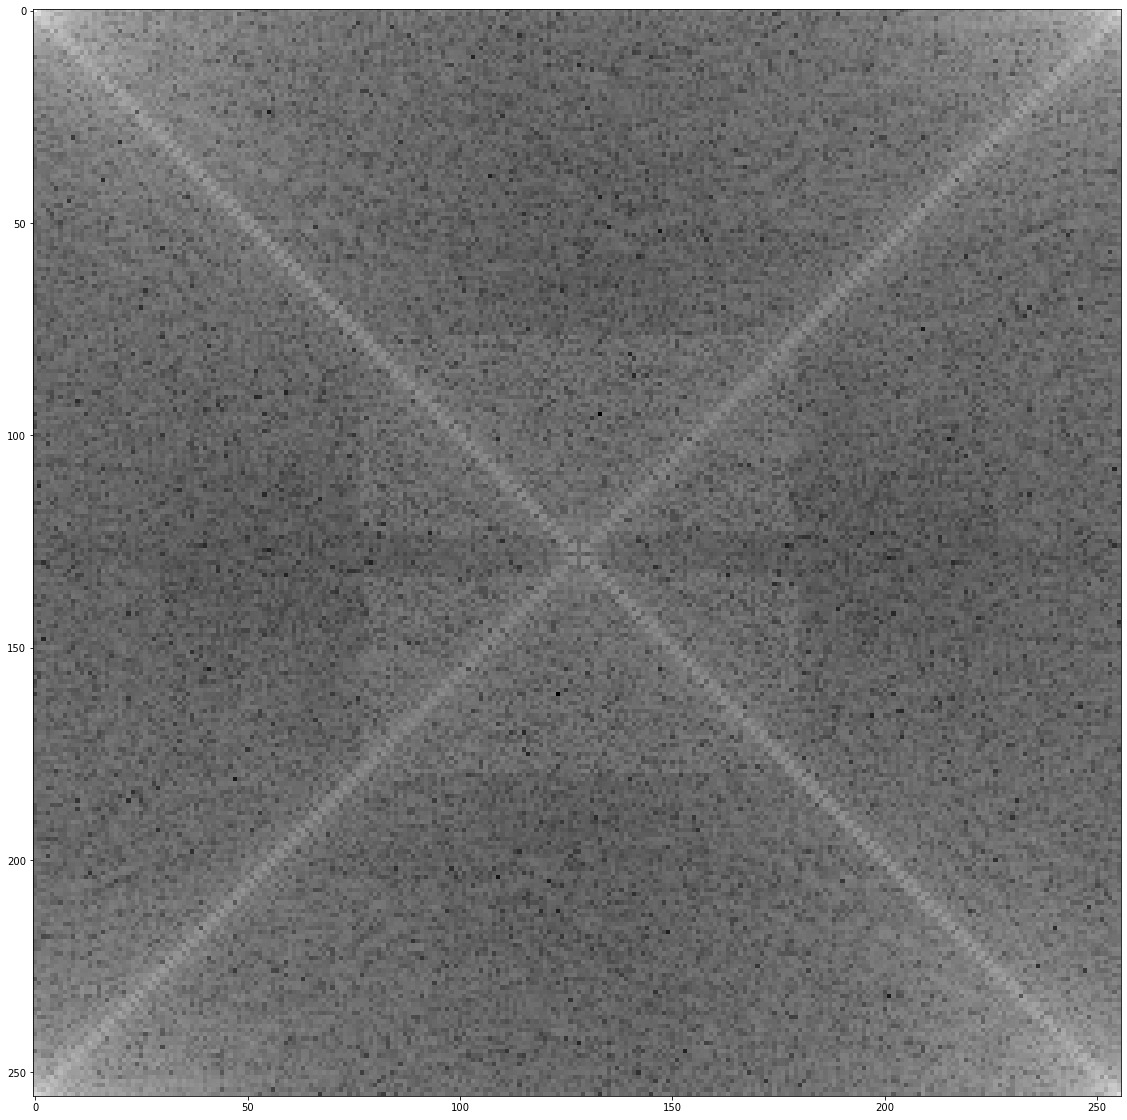

In [24]:
import numpy as np
import matplotlib.pyplot as plt

img_path = "ImageSources\\Steganograms\\lena_color_256_steg_rotate_rotate.png"

image = Image.open(img_path)
red, green, blue = image.split()
fft_abs = 10*np.log10(np.abs(np.fft.fft2(red)))

plt.figure(figsize=(20,20))
plt.imshow(fft_abs, cmap="gray")